<a href="https://colab.research.google.com/github/FareesAhmed786/TequedLabs/blob/main/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section



Importing Modules

In [1]:
import os
for dirname, _, filenames in os.walk('E:\Internship'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#Modules for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [4]:
df = pd.read_csv('Used_Bikes.csv')
df.shape

(32648, 8)

Dropping Null Values

In [5]:
df.drop('bike_name',axis=1,inplace=True)


Brand Counts

In [6]:
brands = df['brand'].value_counts()
bike_brands_less_than_100 = brands[brands<=1000]
bike_brands_less_than_100

Harley-Davidson    737
Kawasaki            79
Hyosung             64
Benelli             56
Mahindra            55
Triumph             26
Ducati              22
BMW                 16
Jawa                10
MV                   4
Indian               3
Ideal                2
Rajdoot              1
LML                  1
Yezdi                1
Name: brand, dtype: int64

Defining others

In [7]:
print("Other brands total",sum(bike_brands_less_than_100))

Other brands total 1077


In [8]:
others = bike_brands_less_than_100.keys()
others


Index(['Harley-Davidson', 'Kawasaki', 'Hyosung', 'Benelli', 'Mahindra',
       'Triumph', 'Ducati', 'BMW', 'Jawa', 'MV', 'Indian', 'Ideal', 'Rajdoot',
       'LML', 'Yezdi'],
      dtype='object')

The python code to set up our graphs for the data visualization is as follows:

In [9]:
bike_groups = df.groupby('brand')
def get_average_plot_data(col,scale=None):
    brands = df['brand'].unique()
    avgs = []
    for brand in brands:
        average = bike_groups.get_group(brand)[col].mean()
        avgs.append(average)
    df1 = pd.DataFrame({"Brand":brands,f"Average {col}":avgs})
    
    x = df1[df1.columns[1]]
    y = df1[df1.columns[0]]
    sns.barplot(data=df1,x=x,y=y)
    plt.title(f"Average {col} of various brands")
    if scale:
        plt.xscale(scale)
    plt.show()

Average age of each bike brand

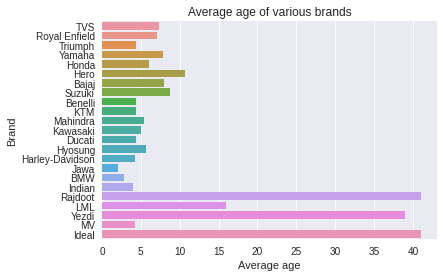

In [10]:
get_average_plot_data('age')

In [11]:
df['city'].value_counts()

Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: city, Length: 443, dtype: int64

Pair Plot

<Figure size 720x720 with 0 Axes>

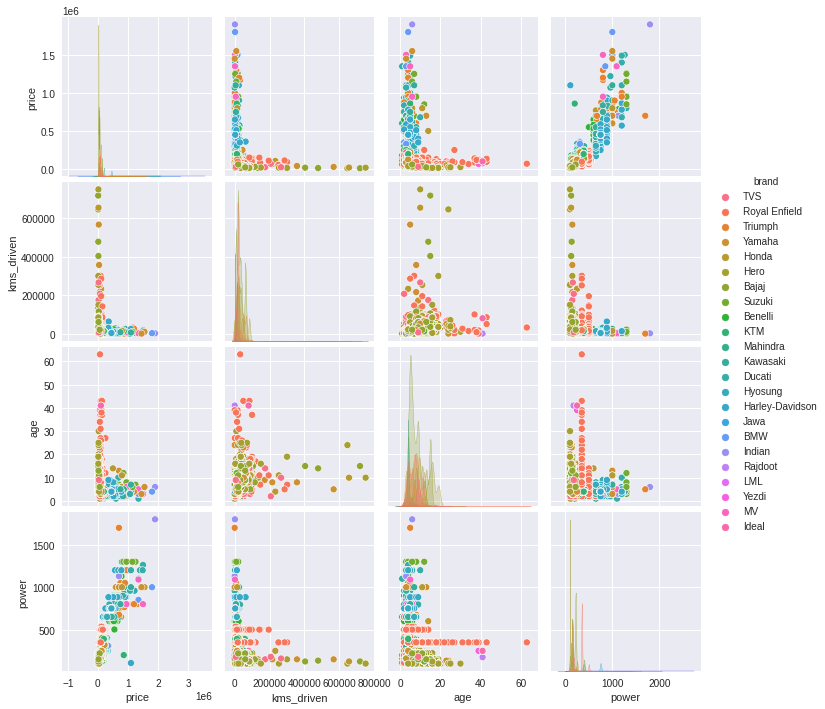

In [12]:
cols_to_plot = ['brand', 'price', 'kms_driven', 'age', 'power']
plt.figure(figsize=(10,10))
sns.pairplot(df[cols_to_plot], hue='brand')
plt.show()

**Data Modeling**

Counting city values(plotting values with less than 500)

In [13]:
city_counts = df['city'].value_counts()
city_counts[city_counts>=500]

Delhi                  7318
Bangalore              2723
Mumbai                 2591
Hyderabad              2160
Pune                   1724
Chennai                1619
Lucknow                1294
Jaipur                 1007
Ghaziabad               938
Ahmedabad               905
Noida                   776
Bhopal                  651
Gautam Buddha Nagar     649
Kanchipuram             640
Jodhpur                 635
Karnal                  625
Rupnagar                621
Allahabad               621
Gurgaon                 617
Godhara                 611
Faridabad               609
Kadapa                  608
Perumbavoor             608
Name: city, dtype: int64

Plotting city values

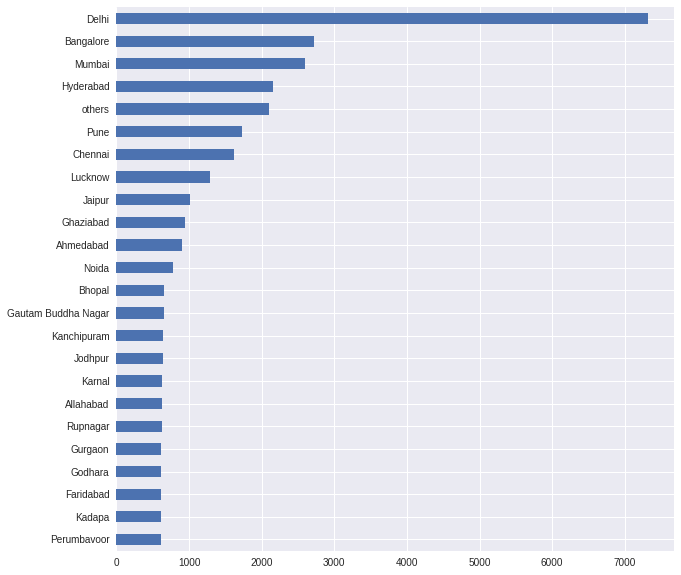

In [14]:
other_cities = city_counts[city_counts<500]
df['city'].replace(other_cities.keys(),'others',inplace=True)
plt.figure(figsize=(10,10))
df['city'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

Plotting no of bikes vs no of owners in the cities

In [15]:
df['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [16]:
df['owner'].replace(['Second Owner','Third Owner','Fourth Owner Or More'],'Second Owner or more',inplace=True)
df['owner'].value_counts()

First Owner             29964
Second Owner or more     2684
Name: owner, dtype: int64

In [17]:
cols_to_encode = ['brand', 'city', 'owner']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.sample(10)

,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,brand_Honda,brand_Hyosung,brand_Ideal,brand_Indian,brand_Jawa,...,city_Kanchipuram,city_Karnal,city_Lucknow,city_Mumbai,city_Noida,city_Perumbavoor,city_Pune,city_Rupnagar,city_others,owner_Second Owner or more
28712,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15561,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8028,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9479,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25095,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26445,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14346,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
cols_to_scale = ['kms_driven', 'age', 'power']
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])
i = 0
for col in cols_to_scale:
    df[col] = scalled[:,i]
    i += 1
df.head()


,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,0.023537,First Owner,0.032258,0.005882,TVS
1,119900.0,Delhi,0.014665,First Owner,0.048387,0.147059,Royal Enfield
2,600000.0,Delhi,0.000145,First Owner,0.112903,0.338235,Triumph
3,65000.0,Bangalore,0.021771,First Owner,0.048387,0.047059,TVS
4,80000.0,Bangalore,0.013332,First Owner,0.032258,0.029412,Yamaha


In [19]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

,price,kms_driven,age,power
0,35000.0,0.023537,0.032258,0.005882
1,119900.0,0.014665,0.048387,0.147059
2,600000.0,0.000145,0.112903,0.338235
3,65000.0,0.021771,0.048387,0.047059
4,80000.0,0.013332,0.032258,0.029412


In [20]:
new_df = pd.concat([dummies,df],axis=1)
new_df.shape

(32648, 50)

In [21]:
new_df.head()


,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,brand_Honda,brand_Hyosung,brand_Ideal,brand_Indian,brand_Jawa,...,city_Noida,city_Perumbavoor,city_Pune,city_Rupnagar,city_others,owner_Second Owner or more,price,kms_driven,age,power
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35000.0,0.023537,0.032258,0.005882
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,119900.0,0.014665,0.048387,0.147059
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,600000.0,0.000145,0.112903,0.338235
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,65000.0,0.021771,0.048387,0.047059
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,80000.0,0.013332,0.032258,0.029412


In [22]:
sum(new_df.isna().sum())

0

In [23]:
x ,y = new_df.drop(['price'],axis=1), new_df['price']
x.shape, y.shape

((32648, 49), (32648,))

In [24]:
y.head()

0     35000.0
1    119900.0
2    600000.0
3     65000.0
4     80000.0
Name: price, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape

((22853, 49), (9795, 49))

In [26]:
y_train.shape, y_test.shape

((22853,), (9795,))

Scoring the Model 

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
model.score(x_test,y_test)

0.9273435386068691

In [29]:
model.score(x_train,y_train)

0.9062069249127822

Comparison and Measurement

In [30]:
models = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor()]
mean_scores = []
for model in models:
    print("Model:",model)
    cv_scores = cross_val_score(model, x, y, cv=5)
    print("Cross Val Scores:",cv_scores)
    print("Mean score:", cv_scores.mean())
    mean_scores.append(cv_scores.mean())
    print('\n')

Model: LinearRegression()
Cross Val Scores: [0.80862196 0.84516188 0.98876611 0.98879154 0.98872356]
Mean score: 0.9240130108280088


Model: Ridge()
Cross Val Scores: [0.81031699 0.83246    0.98883482 0.98885936 0.98879382]
Mean score: 0.9218529972905344


Model: Lasso()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.104e+12, tolerance: 1.737e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.306e+12, tolerance: 2.071e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Cross Val Scores: [0.80737181 0.83636591 0.98832451 0.98835774 0.98827623]
Mean score: 0.9217392404241


Model: KNeighborsRegressor()
Cross Val Scores: [0.68631451 0.81836869 1.         1.         1.        ]
Mean score: 0.9009366389529341




In [31]:
mds = []
for i in range(len(models)):
    mds.append(str(models[i]))
mds

['LinearRegression()', 'Ridge()', 'Lasso()', 'KNeighborsRegressor()']

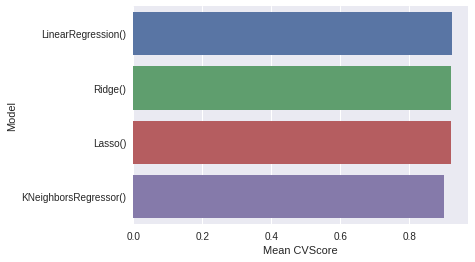

In [32]:
mean_df = pd.DataFrame({'Model':mds, 'Mean CVScore':mean_scores})
sns.barplot(data=mean_df,y='Model', x='Mean CVScore')
plt.show()

In [33]:
svm_model = SVR()
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)

-0.07784285708103456

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
mean_squared_error(y_test, y_pred_test)

590412151.1702828

In [35]:
def actual_vs_predicted(model,data,y_true,title=None):
    pred = model.predict(data)
    apdf = pd.DataFrame({'Actual':y_true, 'Predicted':np.round(pred)})
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=apdf, x='Actual', y='Predicted') 
    plt.title(title)
    plt.show()

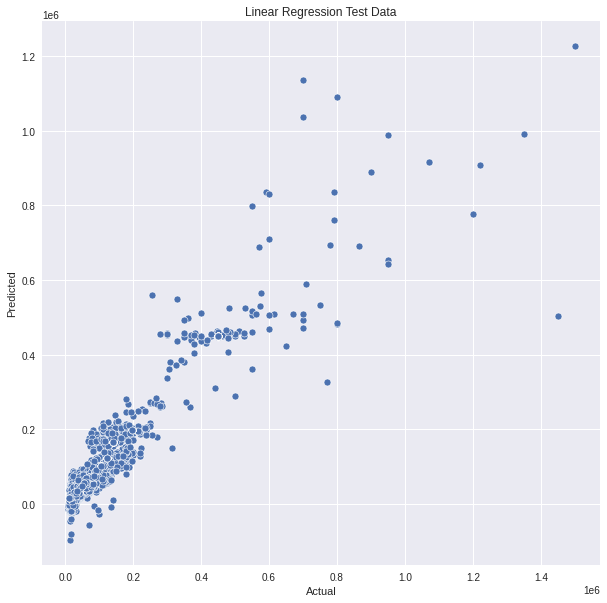

In [36]:
actual_vs_predicted(model,x_test,y_test,'Linear Regression Test Data')

Predicting the Test Results

In [37]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
rfr_model.score(x_test, y_test)

0.96811702248193

In [39]:
rfr_model.score(x_train, y_train)

0.9932701941698191

RandomForestor for Test data

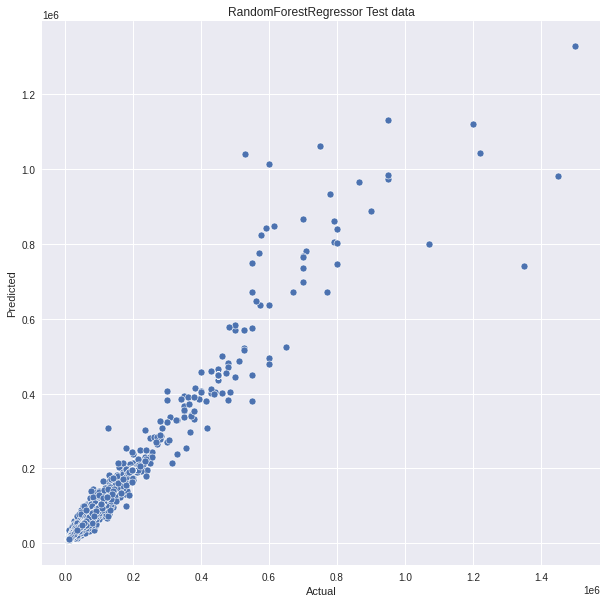

In [40]:
actual_vs_predicted(rfr_model,x_test, y_test, "RandomForestRegressor Test data")

RandomForestor for Train data

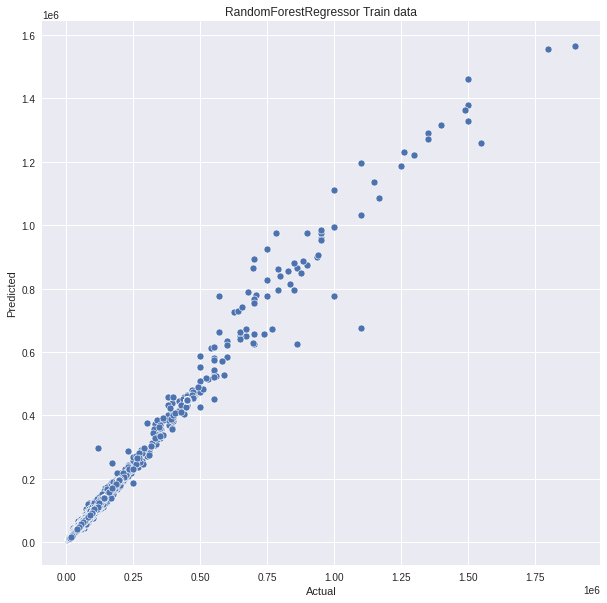

In [41]:
actual_vs_predicted(rfr_model,x_train, y_train, "RandomForestRegressor Train data")